In [1]:
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib widget

In [2]:
file_times = np.frombuffer(b'\xcc\xb4\xcf]\x00\x00\x00\x00\x84\x01\xd0]\x00\x00\x00\x00\xa8\x01\xd0]\x00\x00\x00\x00Td\xd0]\x00\x00\x00\x00\x92d\xd0]\x00\x00\x00\x00\x1f\x06\xd1]\x00\x00\x00\x00',
    dtype="datetime64[s]").reshape((3, 2))
file_times

array([['2019-11-16T08:35:24', '2019-11-16T14:02:44'],
       ['2019-11-16T14:03:20', '2019-11-16T21:04:20'],
       ['2019-11-16T21:05:22', '2019-11-17T08:34:39']],
      dtype='datetime64[s]')

In [15]:
avg_starts = np.arange(np.datetime64(file_times[0, 0], 's'), file_times[-1, -1], np.timedelta64(1, 'h')) + np.timedelta64(5, 'm')
avg_ends = avg_starts + np.timedelta64(40, 'm')
avg_ends[-1] = min(avg_ends[-1], file_times[-1, -1])
avg_length = avg_ends - avg_starts
avg_height = np.ones(len(avg_starts), dtype=float)
avg_bottom = np.zeros(len(avg_starts))

In [4]:
start_times = file_times[:, 0]
length = file_times[:, 1] - start_times
height = np.ones(len(file_times))
bottom = np.zeros(len(file_times))
start_times, length

(array(['2019-11-16T08:35:24', '2019-11-16T14:03:20',
        '2019-11-16T21:05:22'], dtype='datetime64[s]'),
 array([19640, 25260, 41357], dtype='timedelta64[s]'))

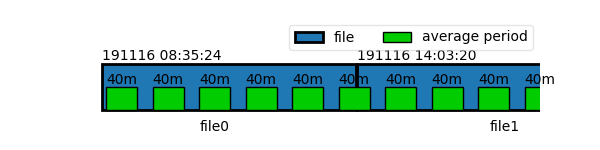

In [19]:
plt.cla()
plt.figure(figsize=(6,1.5))
plt.axis(False)
bar1 = plt.bar(start_times, height, length, bottom, color="#1f77b4", align='edge', edgecolor='k', linewidth=2, label="file")
bar2 = plt.bar(avg_starts, avg_height*0.5, avg_length, avg_bottom, color='#00cc00', align='edge', edgecolor='k', linewidth=1, label="average period")
for i, (s, e) in enumerate(file_times):
    plt.text(s, 1.1, s.astype(datetime).strftime(("%y%m%d %H:%M:%S")), horizontalalignment="left")
    # plt.text(e, -0.1, e.astype(datetime).strftime(("%y%m%d %H:%M:%S")), verticalalignment="top", horizontalalignment="right")
    plt.text(s+(e-s)/2, -0.2,f"file{i}" , verticalalignment="top", horizontalalignment="right")


plt.bar_label(bar2, ["40m"]*len(avg_starts))
# plt.bar_label(bar1, ["file1", "file2"], fontsize="large", fontweight="bold", label_type="center")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d %H'))
plt.xticks(rotation=30)
plt.ylim(-0.5, 2)
plt.xlim(datetime(2019,11,16,8), datetime(2019,11,16,18))
plt.legend(loc = "upper right", ncols=2, framealpha=0.5)
# plt.tight_layout()
plt.show()